In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

file = 'rates 12052021.csv'

In [2]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251',
 'confidence': 0.8592048592477813,
 'language': 'Bulgarian'}

In [3]:
df = pd.read_csv(file, encoding='windows-1251', sep=';', header=1)

In [4]:
df_sliced = df[['SECID', 'SHORTNAME', 'NAME', 'FACEVALUE', 'FACEUNIT', 'DURATION', 'IS_QUALIFIED_INVESTORS', 'HIGH_RISK', 'COUPONFREQUENCY', 'COUPONDATE', 'COUPONPERCENT', 'COUPONVALUE', 'OFFERDATE', 'INN', 'PRICE', 'PRICE_RUB']]

In [5]:
df_rub = df_sliced[df_sliced['FACEUNIT']=='RUB']

In [6]:
df_rub.head(5)

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,COUPONPERCENT,COUPONVALUE,OFFERDATE,INN,PRICE,PRICE_RUB
9,RU000A0JNYN1,МГор48-об,Гор.Обл.Займ Москвы 48 в.,"1000,0",RUB,379.0,0,0,2.0,11.06.2021,"6,00","29,92",NaN,7.710152e+09,"100,118","1026,17"
10,RU000A0JQ5C5,НПФ 01,"""НПФ"" ООО об.сер. 01","1000,0",RUB,NaN,0,1,NaN,06.05.2029,"5,00","1000,55",NaN,6.658197e+09,"100,0","1601,1"
11,RU000A0JQ7Z2,РЖД-19 обл,"""Российские ЖД"" ОАО 19 обл.","1000,0",RUB,1020.0,0,0,2.0,12.07.2021,"7,85","39,14",NaN,7.708504e+09,"103,195","1057,97"
12,RU000A0JQ8V9,Мечел 4об,Мечел ПАО 04 обл.,"50,0",RUB,64.0,0,0,4.0,15.07.2021,"8,00","1,0",NaN,7.703370e+09,"253,9698","127,2849"
13,RU000A0JQAL8,ДОМ.РФ14об,ДОМ.РФ (АО) обл. сер. А14,"1000,0",RUB,677.0,0,0,2.0,15.05.2021,"6,75","33,47",NaN,7.729356e+09,"105,437","1087,29"


In [7]:
df_rub['INN'] = df_rub['INN'].fillna(0).astype(np.int64)

<ipython-input-7-dc46c670ccc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub['INN'] = df_rub['INN'].fillna(0).astype(np.int64)


In [8]:
df_rub.dropna(subset=['COUPONPERCENT'], inplace=True)

<ipython-input-8-ce40e4d0a112>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub.dropna(subset=['COUPONPERCENT'], inplace=True)


In [9]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','.')
    return float(new_val)

In [10]:
df_rub.dropna(subset=['PRICE_RUB'], inplace=True)

<ipython-input-10-4c9aaee94eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub.dropna(subset=['PRICE_RUB'], inplace=True)


In [11]:
df_rub['COUPONPERCENT'] = df_rub['COUPONPERCENT'].apply(convert_currency)
df_rub['FACEVALUE'] = df_rub['FACEVALUE'].apply(convert_currency)
df_rub['PRICE_RUB'] = df_rub['PRICE_RUB'].apply(convert_currency)

<ipython-input-11-4dd245eb6848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub['COUPONPERCENT'] = df_rub['COUPONPERCENT'].apply(convert_currency)
<ipython-input-11-4dd245eb6848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub['FACEVALUE'] = df_rub['FACEVALUE'].apply(convert_currency)
<ipython-input-11-4dd245eb6848>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [12]:
df_rub.head(10)

,SECID,SHORTNAME,NAME,FACEVALUE,FACEUNIT,DURATION,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONFREQUENCY,COUPONDATE,COUPONPERCENT,COUPONVALUE,OFFERDATE,INN,PRICE,PRICE_RUB
9,RU000A0JNYN1,МГор48-об,Гор.Обл.Займ Москвы 48 в.,1000.0,RUB,379.0,0,0,2.0,11.06.2021,6.00,"29,92",NaN,7710152113,"100,118",1026.1700
10,RU000A0JQ5C5,НПФ 01,"""НПФ"" ООО об.сер. 01",1000.0,RUB,NaN,0,1,NaN,06.05.2029,5.00,"1000,55",NaN,6658196868,"100,0",1601.1000
11,RU000A0JQ7Z2,РЖД-19 обл,"""Российские ЖД"" ОАО 19 обл.",1000.0,RUB,1020.0,0,0,2.0,12.07.2021,7.85,"39,14",NaN,7708503727,"103,195",1057.9700
12,RU000A0JQ8V9,Мечел 4об,Мечел ПАО 04 обл.,50.0,RUB,64.0,0,0,4.0,15.07.2021,8.00,"1,0",NaN,7703370008,"253,9698",127.2849
13,RU000A0JQAL8,ДОМ.РФ14об,ДОМ.РФ (АО) обл. сер. А14,1000.0,RUB,677.0,0,0,2.0,15.05.2021,6.75,"33,47",NaN,7729355614,"105,437",1087.2900
14,RU000A0JQAM6,ДОМ.РФ15об,ДОМ.РФ (АО) обл. сер. А15,1000.0,RUB,2172.0,0,0,2.0,15.09.2021,6.75,"34,03",NaN,7729355614,"113,387",1144.6000
15,RU000A0JQRD9,РЖД-23 обл,"""Российские ЖД"" ОАО 23 обл.",1000.0,RUB,1171.0,0,0,2.0,22.07.2021,7.85,"39,14",NaN,7708503727,"103,787",1061.7400
16,RU000A0JQXG0,ДОМ.РФ16об,ДОМ.РФ (АО) обл. сер. А16,100.0,RUB,124.0,0,0,4.0,15.06.2021,8.25,"2,08",NaN,7729355614,"101,0875",102.3975
17,RU000A0JR4U9,ГлДорога 3,Главная дорога АО об.сер. 03,1000.0,RUB,1315.0,0,0,1.0,08.11.2021,4.00,"39,89",NaN,7726581132,"97,888",999.0400
18,RU000A0JR5F7,ДОМ.РФ17об,ДОМ.РФ (АО) обл. сер.А17,150.0,RUB,326.0,0,0,4.0,15.07.2021,9.05,"3,38",NaN,7729355614,"102,652",154.9780


In [13]:
X = df_rub.iloc[:, [10, 15]].values

In [14]:
df_rub.iloc[:, [15]].describe()

,PRICE_RUB
count,2.034000e+03
mean,9.413380e+04
std,1.660177e+06
min,3.500000e+00
25%,9.832650e+02
50%,1.014775e+03
75%,1.042490e+03
max,6.678942e+07


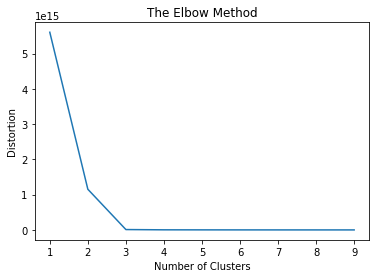

In [15]:
distortion = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(X)
    distortion.append(model.inertia_) 
plt.plot(K, distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion');

In [16]:
model = KMeans(n_clusters=3, random_state=12345)
y_means = model.fit_predict(X)

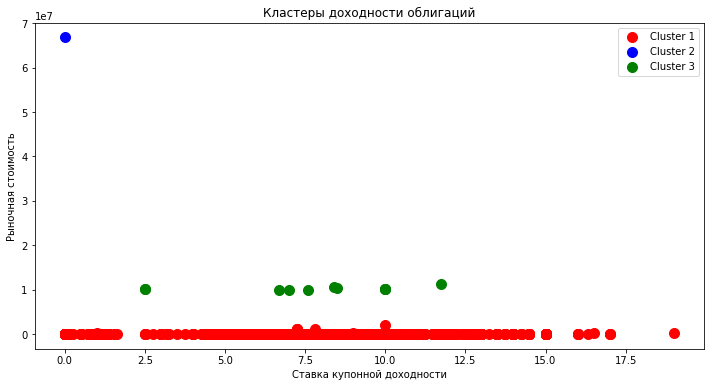

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=100, c='green', label='Cluster 3')
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Кластеры доходности облигаций')
plt.ylabel('Рыночная стоимость')
plt.xlabel('Cтавка купонной доходности')
plt.legend();

In [18]:
df_rub['CLUSTER'] = y_means

<ipython-input-18-9bd3458e1619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rub['CLUSTER'] = y_means


In [286]:
#df_rub['CLUSTER'] = df_rub['CLUSTER'].astype(np.int)
df_cheap = df_rub[df_rub['CLUSTER']==0]

In [287]:
X = df_cheap.iloc[:, [15, 10]].values

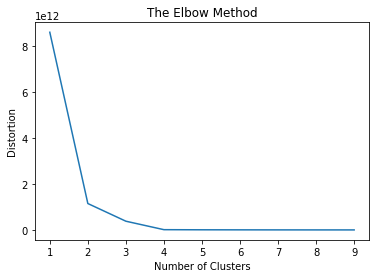

In [288]:
distortion = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(X)
    distortion.append(model.inertia_) 
plt.plot(K, distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion');

In [292]:
model = KMeans(n_clusters=2, random_state=12345)
y_means = model.fit_predict(X)

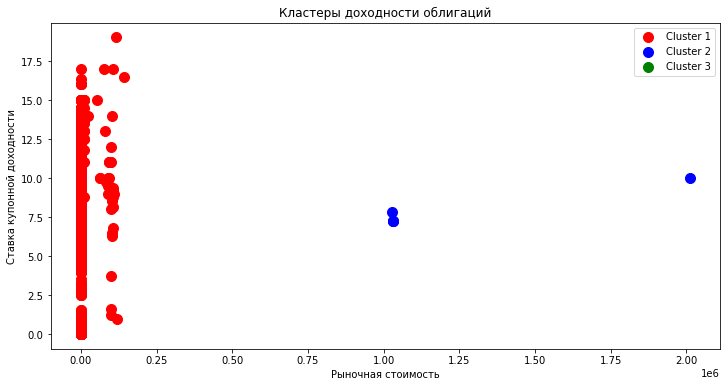

In [293]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=100, c='green', label='Cluster 3')
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Кластеры доходности облигаций')
plt.xlabel('Рыночная стоимость')
plt.ylabel('Cтавка купонной доходности')
plt.legend();